In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Before solving the Simple Harmonic Motion problem, the Euler, RK2 and RK4 methods are illustrated with simple first order equations.

# Euler method

In [1]:
#euler method

#test function
def deriv(x):
     return x+x**2

# N times h gives the position where 
# the solution is intended to be found.
def euler(h,A0,N):
    slope = deriv(A0)
    y=A0
    
    for i in range(N):
        y=y+slope*(h)
        slope=deriv((i+1)*h)
        #print(y)
    return y

In [3]:
#solution function
def inte(x,A0):
    return (x**2)/2+(x**3)/3+A0
    

In [4]:
inte(5,1)

55.166666666666664

In [3]:
euler(0.1,1,50)

53.87500000000001

The euler method gave a result close to the actual value as seen above.

# Midpoint method

In [102]:
#define implicit derivative function. denote by f
def f(t,y):
    return -t*y

In [103]:
#midpoint method
def midpoint(h,N,A0,ti):
    init = A0
    y = init
    t = ti
    for i in range(N):
        y = y + h*f(t+(h/2),y+(h/2)*f(t,y))
        t = t + h
    return (y)

In [105]:
#integral function
def inte2(t):
    return np.e**(-(t**2)/2)

In [104]:
midpoint(0.1,11,1,0)

0.5455401226110081

In [106]:
inte2(1.1)

0.5460744266397094

The above comparison with the actual solution shows that the midpoint method gives quite accurate result.

# Runge-Kutta method (RK4)

In [108]:
#using same function for rk4
#same function is used as in the midpoint method.
def rk4(h,N,A0,ti):
    y = A0
    t = ti
    for i in range(N):
        k1 = f(t,y)
        k2 = f(t+(h/2),y+(h/2)*k1)
        k3 = f(t+(h/2),y+(h/2)*k2)
        k4 = f(t+h,y+h*k3)
        y = y + (1/6)*(k1+2*k2+2*k3+k4)*h
        t = t + h
    return (y)

In [109]:
rk4(0.1,11,1,0)

0.546074543109848

In [107]:
inte2(1.1)

0.5460744266397094

Clearly, the Runge-Kutta RK4 method gives more accurate result than the Midpoint (RK2) method.

# Solving the harmonic oscillator problem

The equation satisfying the SHM problem is
$$\ddot{x} = -\omega^2 x$$
This equation can be solved numerically using the above illustrated methods of Euler, Runge Kutta methods by writing it as two coupled first order differential equations which are
$$\dot{x}=p$$
$$\dot{p}=-x$$
These equations are written considering k=m=1. This will be solve considering the initial conditions $x(t) = 0$ and $p(t)=1$.\\
After solving, it will be seen that the Euler method does not give accurate results as it gives a diverging unphysical solution.\\
Whereas, the RK2 and RK4 methods give good results. This is seen in the comparison plots of Energy, position and phase space shown below in the end.

# Euler method

In [23]:
def x_dot(p):
    return p
def p_dot(x):
    return -x

In [26]:
def SHM_euler(ti,x0,p0,N,h):
    
    t = np.arange(ti,N*h,h)
    x = np.zeros(len(t))
    p = np.zeros(len(t))
    x[0] = x0
    p[0] = p0
    
    for i in range(len(t)-1):
        x[i+1] = x[i] + h*x_dot(p[i])
        p[i+1] = p[i] + h*p_dot(x[i])
        
        
    return t,x,p

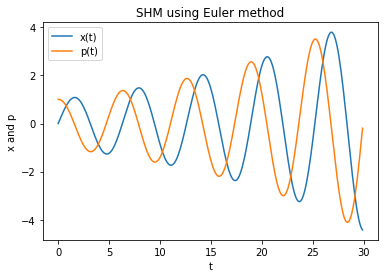

In [89]:
plt.plot(SHM_euler(0,0,1,300,0.1)[0],SHM_euler(0,0,1,300,0.1)[1],label='x(t)')
plt.plot(SHM_euler(0,0,1,300,0.1)[0],SHM_euler(0,0,1,300,0.1)[2],label='p(t)')
plt.ylabel('x and p')
plt.xlabel('t')
plt.title('SHM using Euler method')
plt.legend()

Text(0.5, 1.0, 'Energy plot for Euler method')

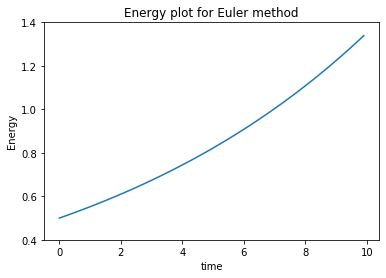

In [78]:
p1 = np.array(SHM_euler(0,0,1,100,0.1)[2])
x1 = np.array(SHM_euler(0,0,1,100,0.1)[1])
t1 = np.array(SHM_euler(0,0,1,100,0.1)[0])
E1 = (1/2)*(p1**2+x1**2)
plt.plot(t1,E1)
plt.ylim(0.4,1.4)
plt.ylabel('Energy')
plt.xlabel('time')
plt.title('Energy plot for Euler method')

# Midpoint method (RK2)

In [72]:
def SHM_midpoint(ti,x0,p0,N,h):
    t,x,p = [],[],[]
    t.append(ti)
    x.append(x0)
    p.append(p0)
    for i in range(N-1):
        kx1 = x_dot(p[i])
        kp1 = p_dot(x[i])
        kx2 = x_dot(p[i]+h*kp1)
        kp2 = p_dot(x[i]+h*kx1)
        
        x.append(x[i]+(h/2)*(kx1+kx2))
        p.append(p[i]+(h/2)*(kp1+kp2))
        ti = ti + h
        t.append(ti)      
        
    return t,x,p

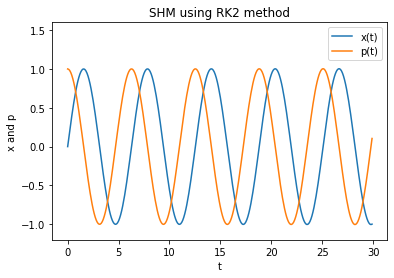

In [88]:
plt.plot(SHM_midpoint(0,0,1,300,0.1)[0],SHM_midpoint(0,0,1,300,0.1)[1],label='x(t)')
plt.plot(SHM_midpoint(0,0,1,300,0.1)[0],SHM_midpoint(0,0,1,300,0.1)[2],label='p(t)')
plt.ylabel('x and p')
plt.xlabel('t')
plt.title('SHM using RK2 method')
plt.ylim(-1.2,1.6)
plt.legend()

Text(0.5, 1.0, 'Energy plot for RK2 method')

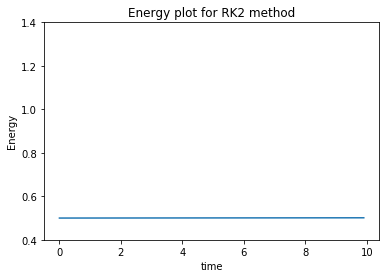

In [79]:
p2 = np.array(SHM_midpoint(0,0,1,100,0.1)[2])
x2 = np.array(SHM_midpoint(0,0,1,100,0.1)[1])
t2 = np.array(SHM_midpoint(0,0,1,100,0.1)[0])
E2 = (1/2)*(p2**2+x2**2)
plt.plot(t2,E2)
plt.ylim(0.4,1.4)
plt.ylabel('Energy')
plt.xlabel('time')
plt.title('Energy plot for RK2 method')

# Runge-Kutta method (RK4)

In [75]:
def SHM_rk4(ti,x0,p0,N,h):
    t,x,p = [],[],[]
    t.append(ti)
    x.append(x0)
    p.append(p0)
    for i in range(N-1):
        kx1 = x_dot(p[i])
        kp1 = p_dot(x[i])
        
        kx2 = x_dot(p[i]+(h/2)*kp1)
        kp2 = p_dot(x[i]+(h/2)*kx1)
        
        kx3 = x_dot(p[i]+(h/2)*kp2)
        kp3 = p_dot(x[i]+(h/2)*kx2)
        
        kx4 = x_dot(p[i]+h*kp3)
        kp4 = p_dot(x[i]+h*kx3)
        
        x.append(x[i] + (1/6)*(kx1+2*kx2+2*kx3+kx4)*h)
        p.append(p[i] + (1/6)*(kp1+2*kp2+2*kp3+kp4)*h)
        
        ti = ti + h
        t.append(ti)
        
    return t,x,p

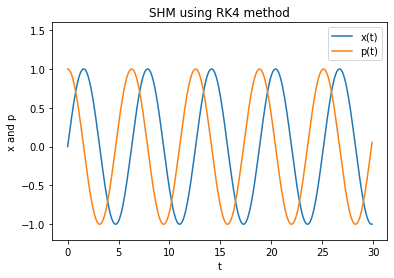

In [87]:
plt.plot(SHM_rk4(0,0,1,300,0.1)[0],SHM_rk4(0,0,1,300,0.1)[1],label='x(t)')
plt.plot(SHM_rk4(0,0,1,300,0.1)[0],SHM_rk4(0,0,1,300,0.1)[2],label='p(t)')
plt.ylabel('x and p')
plt.xlabel('t')
plt.title('SHM using RK4 method')
plt.ylim(-1.2,1.6)
plt.legend()

Text(0.5, 1.0, 'Energy plot for RK4 method')

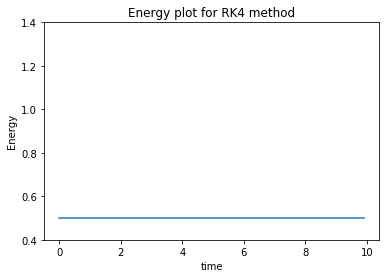

In [80]:
p3 = np.array(SHM_rk4(0,0,1,100,0.1)[2])
x3 = np.array(SHM_rk4(0,0,1,100,0.1)[1])
t3 = np.array(SHM_rk4(0,0,1,100,0.1)[0])
E3 = (1/2)*(p3**2+x3**2)
plt.plot(t3,E3)
plt.ylim(0.4,1.4)
plt.ylabel('Energy')
plt.xlabel('time')
plt.title('Energy plot for RK4 method')

# Comparison plots

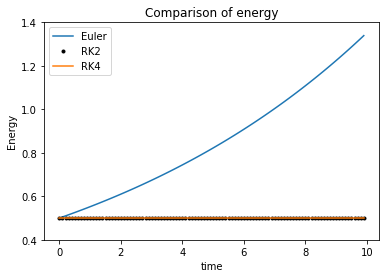

In [110]:
plt.plot(t1,E1,label='Euler')
plt.plot(t2,E2,'k.',label='RK2')
plt.plot(t3,E3,label='RK4')
plt.ylim(0.4,1.4)
plt.ylabel('Energy')
plt.xlabel('time')
plt.title('Comparison of energy')
plt.legend()

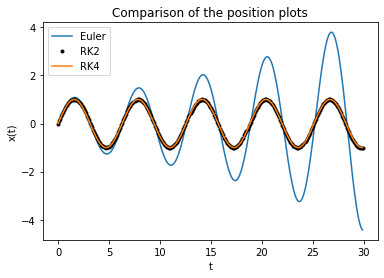

In [96]:
plt.plot(SHM_euler(0,0,1,300,0.1)[0],SHM_euler(0,0,1,300,0.1)[1],label='Euler')
plt.plot(SHM_midpoint(0,0,1,300,0.1)[0],SHM_midpoint(0,0,1,300,0.1)[1],'k.',label='RK2')
plt.plot(SHM_rk4(0,0,1,300,0.1)[0],SHM_rk4(0,0,1,300,0.1)[1],label='RK4')
plt.ylabel('x(t)')
plt.xlabel('t')
plt.title('Comparison of the position plots')

plt.legend()

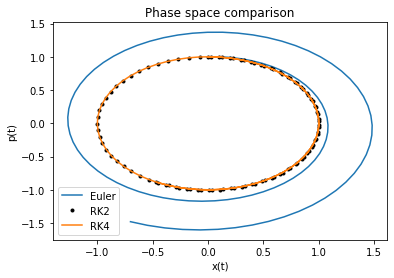

In [99]:
plt.plot(x1,p1,label='Euler')
plt.plot(x2,p2,'k.',label='RK2')
plt.plot(x3,p3,label='RK4')
plt.ylabel('p(t)')
plt.xlabel('x(t)')
plt.title('Phase space comparison')
plt.legend()